In [21]:
import networkx as nx
from graphs import generate_politician_party_relation, generate_politician_org_relation
import matplotlib.pyplot as plt

In [22]:
graph = nx.DiGraph()
generate_politician_party_relation(graph, 10)
generate_politician_org_relation(graph, 0, 70)


In [23]:
attributes = nx.get_node_attributes(graph, "type")
mapping = {
    "party": "blue",
    "politician": "orange",
    "organization": "lightblue"
}
colors = [mapping[attribute] for attribute in attributes.values()]
pos = nx.nx_agraph.graphviz_layout(graph, prog="dot") #"dot", "sfdp", neato

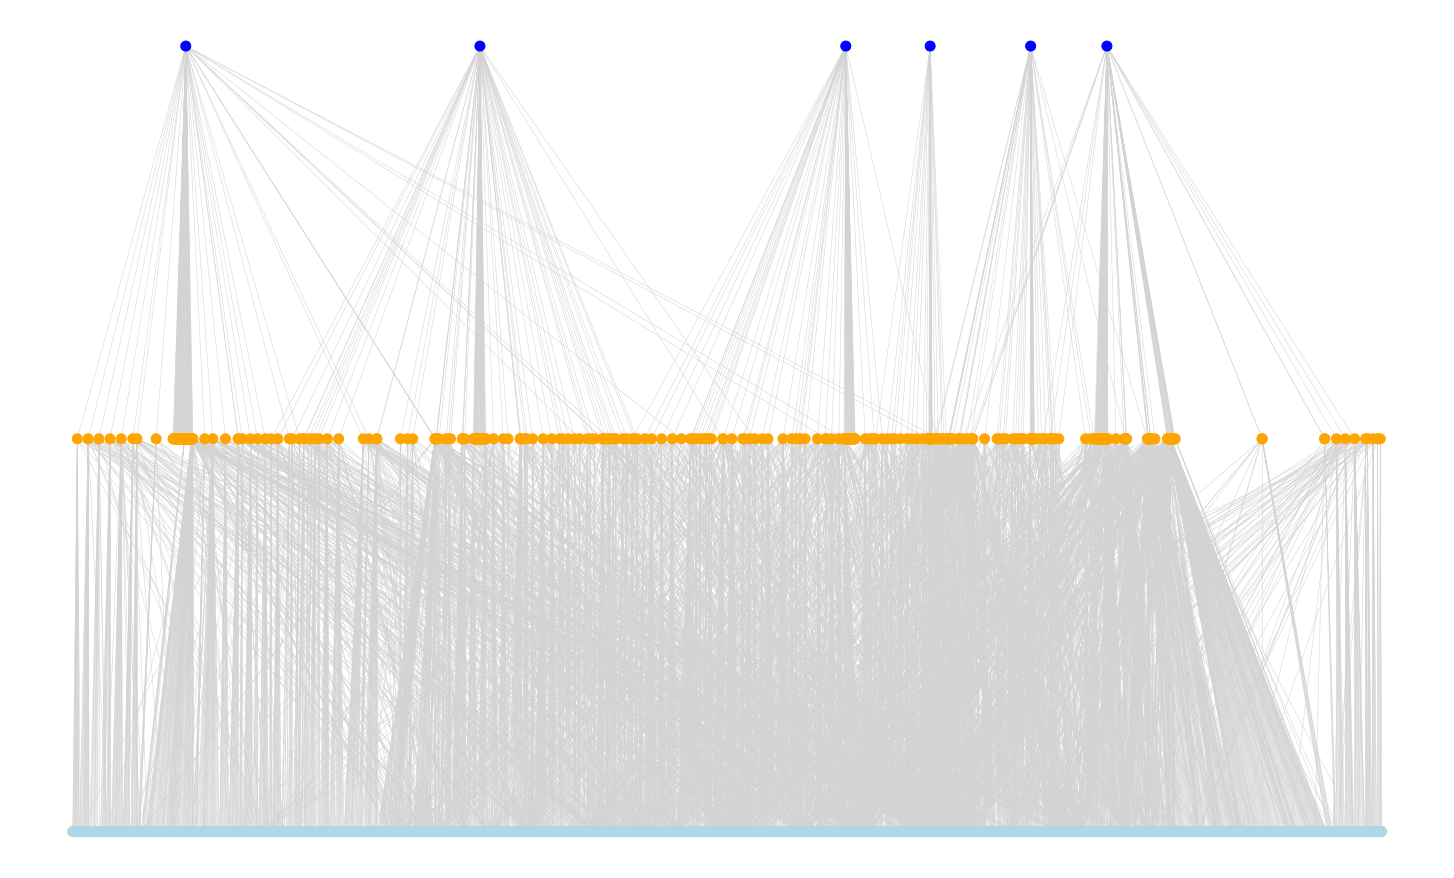

In [15]:
plt.figure(figsize=(20, 12))
#pos = nx.nx_agraph.graphviz_layout(graph)
#pos = nx.spring_layout(graph)

options = {
    'node_size': 100,
    'width': 0.5,
    'arrows': False,
    'edge_color': "lightgrey"
}
nx.draw(graph, node_color=colors, pos=pos, **options)
plt.show()